## mom6-mitgcm mr plots



In [26]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [10]:
#base_folder = '/scratch/x77/cy8964/mom6/archive/'
#base_folder = '/home/156/cy8964/mom6-control/isomip-control/ISOMIP-MOM6-examples/'
base_folder = '/g/data/x77/cy8964/mom6/archive/'

list_folders = ['layer-thermo-on-warm_CC','layer-thermo-on-warm_SF',
               'layer-thermo-on-cold_CC','layer-thermo-on-cold_SF']
base_folder

'/g/data/x77/cy8964/mom6/archive/'

In [29]:
## define some useful functions
ymax = 720
def open_files(i):
    base = base_folder + list_folders[i]
    #prog = xr.open_dataset(base + '/archive/output000/prog__0002_002.nc')
    prog = xr.open_dataset(base + '/output000/prog__0002_002.nc')
    
    #ocean_daily_z = xr.open_dataset(base + 'output000/ocean_daily_z.nc')
    #ocean_geometry = xr.open_dataset(base + "/archive/output000/ocean_geometry.nc")
    ocean_geometry = xr.open_dataset(base + "/output000/ocean_geometry.nc")
    return prog, ocean_geometry
def open_ocean_daily_z(i):
    base = base_folder + list_folders[i]
    #prog = xr.open_dataset(base + '/archive/output000/ocean_daily_z.nc')
    prog = xr.open_dataset(base + '/output000/ocean_daily_z.nc')
    return prog


In [30]:
# column bar
mrs = np.zeros(4*3)
s_to_year = 3600*24*365
tt = np.arange(-180,0)
list_folders_base = ['layer-thermo-on-warm_CC','layer-thermo-on-warm_SF',
               'layer-thermo-on-cold_CC','layer-thermo-on-cold_SF']
suffixes = ['-ustarmin','','-MK18']
for n in np.arange(len(suffixes)):
    list_folders = [x+suffixes[n] for x in list_folders_base]
    print(list_folders)
    for i in np.arange(4):
        ocean_daily_z = open_ocean_daily_z(i)
        dataplot = ocean_daily_z.melt.where(ocean_daily_z.melt!=0).mean(['xT','yT']).isel(time = tt).mean('time').values
        mrs[i+n*4]= dataplot
#get uncertainty
tt = np.arange(-180,0)

unc = np.zeros(4)
list_folders = ['layer-thermo-on-warm_SF_max','layer-thermo-on-warm_SF_min',
               'layer-thermo-on-cold_SF_max','layer-thermo-on-cold_SF_min']
for i in np.arange(4):
    ocean_daily_z = open_ocean_daily_z(i)
    dataplot = ocean_daily_z.melt.where(ocean_daily_z.melt!=0).mean(['xT','yT']).isel(time = tt).mean('time').values
    unc[i]= dataplot

print(unc)


species = ("Minimum $u_*$, \n $u_* =$max$(10^{-4},\sqrt{c_d}U_{ml})$", 
           "Tidal $u_*$, \n $u_* =\sqrt{c_d}\sqrt{U_{ml}^2+U_{tide}^2}$", 
           "Convective \n McConnochie & Kerr (2018) \n lab-based limit")#,
penguin_means = {
    'Warm CC': (mrs[0],mrs[4],mrs[8]),
    'Warm SF': (mrs[1],mrs[5],mrs[9]),
    'Cold CC':(mrs[2],mrs[6],mrs[10]),
    'Cold SF':(mrs[3],mrs[7],mrs[11])    
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(dpi = 200, figsize = (12,6))

# for attribute, measurement in penguin_means.items():
#     offset = width * multiplier
#     if attribute == 'Warm CC':
#         rects = ax.bar(x + offset, measurement, width, label=attribute, color = 'indianred', edgecolor = 'k', hatch = 'xxx')
#     elif attribute == 'Warm SF':
#         rects = ax.bar(x + offset, measurement, width, label=attribute, yerr = ((0,unc[1]-mrs[5],0),(0,mrs[5]-unc[0],0,)),capsize=5, color = 'indianred', edgecolor = 'k', hatch = None, alpha = 0.7)
#     elif attribute == 'Cold CC':
#         rects = ax.bar(x + offset, measurement, width, label=attribute, color = 'steelblue', edgecolor = 'k', hatch = 'xxx')
#     elif attribute == 'Cold SF':
#         rects = ax.bar(x + offset, measurement, width, label=attribute, yerr = ((0,unc[3]-mrs[7],0,),(0,mrs[7]-unc[2],0,)),capsize=5, color = 'steelblue', edgecolor = 'k', hatch = None, alpha = 0.7)

#     #ax.bar_label(rects, padding=1)
#     multiplier += 1
#         #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr = ((-0.2584+0.337,-0.036+0.039),(0.556-0.337,0.046-0.039)),capsize=10,color = ('indianred','steelblue'), edgecolor = 'k', hatch = None, alpha = 0.7)

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Area-averaged melt rate (m/yr)', fontsize = 14)
# ax.set_title('Melt rate comparison - MOM6', fontsize = 18)
# ax.set_xticks(x + width*3/2, species, fontsize = 11, rotation=-10)
# ax.legend(loc='upper left')#, ncols=3)
# ax.set_ylim(-0.1, np.max(mrs)+0.1)

# #plt.subplots_adjust(hspace = 0.4)
# #fig.tight_layout(pad=5.0)
# plt.show()

['layer-thermo-on-warm_CC-ustarmin', 'layer-thermo-on-warm_SF-ustarmin', 'layer-thermo-on-cold_CC-ustarmin', 'layer-thermo-on-cold_SF-ustarmin']
['layer-thermo-on-warm_CC', 'layer-thermo-on-warm_SF', 'layer-thermo-on-cold_CC', 'layer-thermo-on-cold_SF']
['layer-thermo-on-warm_CC-MK18', 'layer-thermo-on-warm_SF-MK18', 'layer-thermo-on-cold_CC-MK18', 'layer-thermo-on-cold_SF-MK18']
[0.29912457 0.4357262  0.0340577  0.03477659]


In [27]:
def open_files_mit(i):
    base_folder_mit = '/scratch/x77/cy8964/gadi_short/cy8964/mitgcm/archive/'
#    base_folder_mit = '/g/data/x77/cy8964/mitgcm/archive/'
    
    folder = base_folder_mit+list_folders[i]+'/output001/'
    folder1 = base_folder_mit+list_folders[i]+'/output000/'
    
    grid = xr.open_dataset(folder1 + 'grid.nc')    
    tave = xr.open_dataset(folder + 'tave.nc')
    shelficetave = xr.open_dataset(folder + 'shelfice_tave.nc')
    shelfsnap = xr.open_dataset(folder + 'shelfsnap.nc')
    return grid, tave, shelficetave, shelfsnap# column bar
no_configs = 4
mrs_mit = np.zeros(no_configs*3)
s_to_year = 3600*24*365
rho0 = 1000
time_slice = np.arange(-180,0)
list_folders_base = ['run-J10-warm', 'run-R22-warm', 'run-J10-cold', 'run-R22-cold']
suffixes = ['-ustarmin','-utide','-convectivelimitlocal']
for n in np.arange(len(suffixes)):
    list_folders = [x+suffixes[n] for x in list_folders_base]
    print(list_folders)
    for i in np.arange(no_configs):
        grid, tave, shelficetave, shelfsnap = open_files_mit(i)
        melt = -s_to_year/rho0*shelficetave.fwFluxtave.where(shelficetave.fwFluxtave !=0).mean(['X','Y']).isel(T = time_slice).mean('T').values
        mrs_mit[i+n*4]= melt


['run-J10-warm-ustarmin', 'run-R22-warm-ustarmin', 'run-J10-cold-ustarmin', 'run-R22-cold-ustarmin']
['run-J10-warm-utide', 'run-R22-warm-utide', 'run-J10-cold-utide', 'run-R22-cold-utide']
['run-J10-warm-convectivelimitlocal', 'run-R22-warm-convectivelimitlocal', 'run-J10-cold-convectivelimitlocal', 'run-R22-cold-convectivelimitlocal']


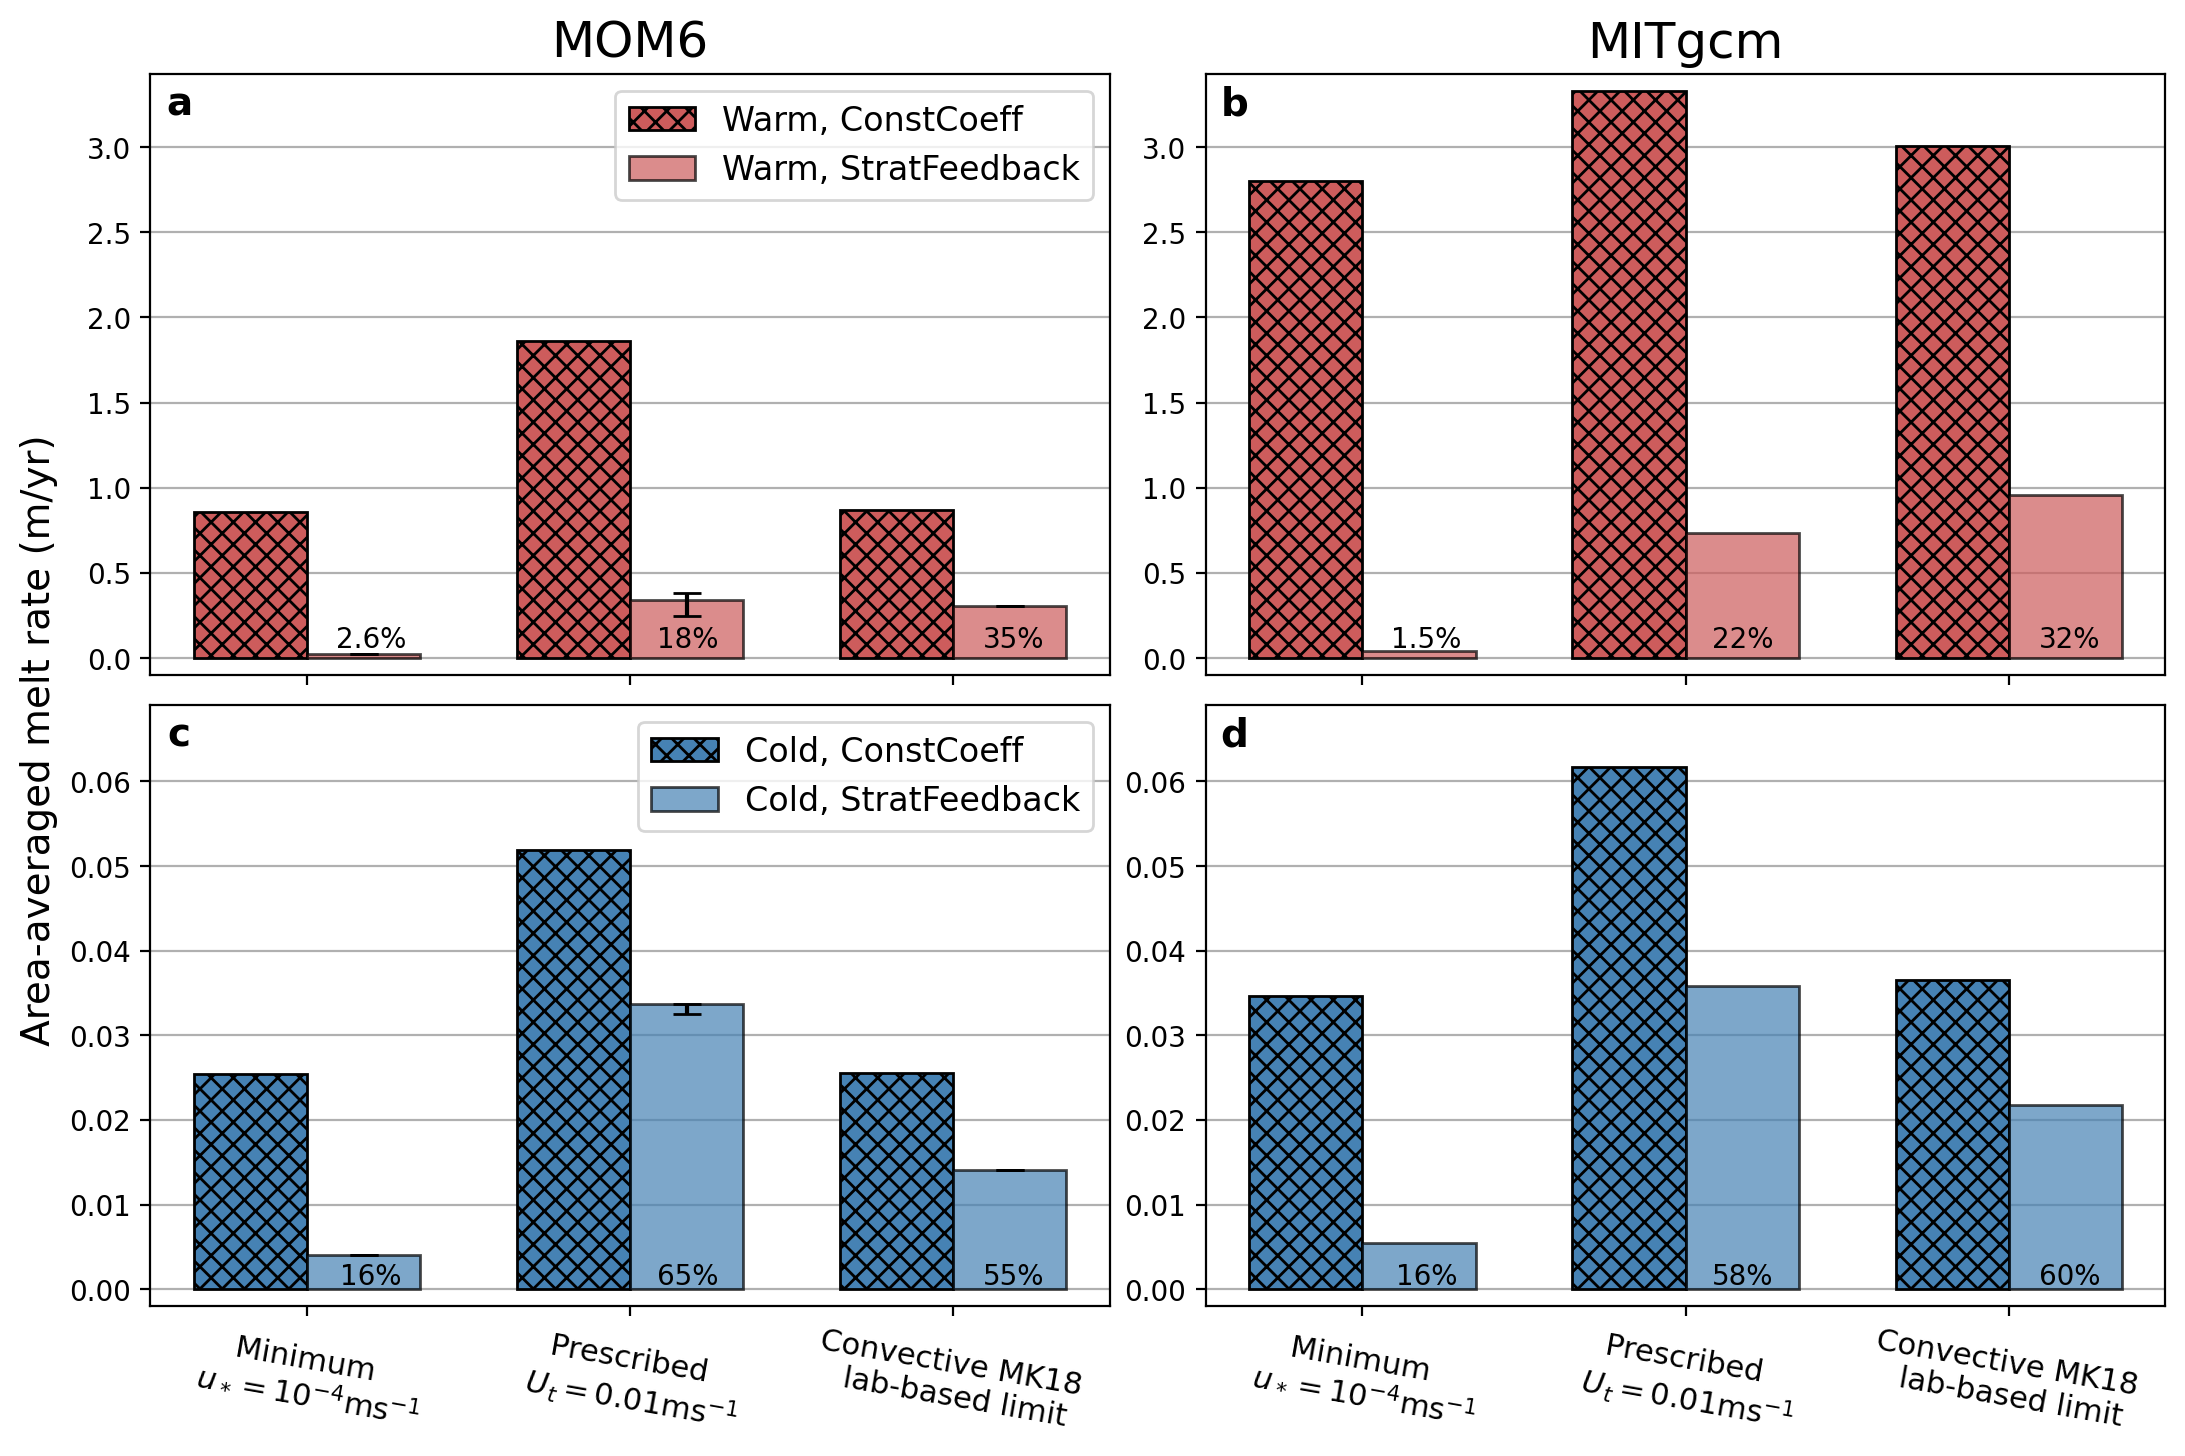

In [31]:
species = ("Minimum \n $u_*=10^{-4}$ms$^{-1}$", 
           "Prescribed \n $U_{t} = 0.01$ms$^{-1}$",
           "Convective MK18 \n lab-based limit")#,
          #"Convective \n MK18 limit, \n"+r" $\theta = 85^\circ$",
          #"Convective \n MK18 limit, \n"+r" $\theta = 89^\circ$",
          #"Convective \n MK18 limit, \n"+r"constant $\theta = 89.9^\circ$")
penguin_means = {
    'Warm, ConstCoeff': (mrs[0],mrs[4],mrs[8]),
    'Warm, StratFeedback': (mrs[1],mrs[5],mrs[9]),
    'Cold, ConstCoeff':(mrs[2],mrs[6],mrs[10]),
    'Cold, StratFeedback':(mrs[3],mrs[7],mrs[11])    
}

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, axes = plt.subplots(ncols = 2,nrows = 2, dpi = 200, figsize = (13,8),sharex = True)

for attribute, measurement in penguin_means.items():
    if attribute == 'Warm, ConstCoeff':
        multiplier = 0
        offset = width * multiplier
        rects = axes[0,0].bar(x + offset, measurement, width, label=attribute, color = 'indianred', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Warm, StratFeedback':
        multiplier = 1
        offset = width * multiplier        
        rects = axes[0,0].bar(x + offset, measurement, width, label=attribute, yerr = ((0,unc[1]-mrs[5],0),(0,mrs[5]-unc[0],0,)),capsize=5, color = 'indianred', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)
    elif attribute == 'Cold, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[1,0].bar(x + offset, measurement, width, label=attribute, color = 'steelblue', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Cold, StratFeedback':
        multiplier = 1
        offset = width * multiplier
        rects = axes[1,0].bar(x + offset, measurement, width, label=attribute, yerr = ((0,unc[3]-mrs[7],0,),(0,max(0,mrs[7]-unc[2]),0,)),
                              capsize=5, color = 'steelblue', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)

    #ax.bar_label(rects, padding=1)
        #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr = ((-0.2584+0.337,-0.036+0.039),(0.556-0.337,0.046-0.039)),capsize=10,color = ('indianred','steelblue'), edgecolor = 'k', hatch = None, alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
#axes[0,0].set_ylabel('Area-averaged melt rate (m/yr)', fontsize = 14)
axes[1,0].set_ylabel('                                           Area-averaged melt rate (m/yr)', fontsize = 14)
axes[0,0].set_title('MOM6', fontsize = 18)
axes[0,0].set_xticks(x + width*1/2, '', fontsize = 11, rotation=-10)
axes[1,0].set_xticks(x + width*1/2, species, fontsize = 11, rotation=-10)
axes[0,0].legend(loc='upper right', fontsize = 12)#, ncols=3)
#axes[1,0].legend(loc='upper left')#, ncols=3)

axes[0,0].set_ylim(-0.1, np.max(mrs_mit)+0.1)
axes[1,0].set_ylim(-0.002, 0.069)


penguin_means = {
    'Warm, ConstCoeff': (mrs_mit[0],mrs_mit[4],mrs_mit[8]),
    'Warm, StratFeedback': (mrs_mit[1],mrs_mit[5],mrs_mit[9]),
    'Cold, ConstCoeff':(mrs_mit[2],mrs_mit[6],mrs_mit[10]),
    'Cold, StratFeedback':(mrs_mit[3],mrs_mit[7],mrs_mit[11])}    

multiplier = 0

for attribute, measurement in penguin_means.items():
    #offset = width * multiplier
    if attribute == 'Warm, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[0,1].bar(x + offset, measurement, width, label=attribute, color = 'indianred', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Warm, StratFeedback':
        multiplier = 1    
        offset = width * multiplier
        rects = axes[0,1].bar(x + offset, measurement, width, label=attribute,capsize=5, color = 'indianred', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)
    elif attribute == 'Cold, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[1,1].bar(x + offset, measurement, width, label=attribute, color = 'steelblue', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Cold, StratFeedback':
        multiplier = 1      
        offset = width * multiplier
        rects = axes[1,1].bar(x + offset, measurement, width, label=attribute,capsize=5, color = 'steelblue', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)

    #ax.bar_label(rects, padding=1)
    #multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
#axes[1].set_ylabel('Area-averaged melt rate (m/yr)', fontsize = 14)
axes[0,1].set_title('MITgcm', fontsize = 18)
axes[0,1].set_xticks(x + width*1/2, '', fontsize = 11, rotation=-10)
axes[1,1].set_xticks(x + width*1/2, species, fontsize = 11, rotation=-10)
#axes[1].legend(loc='upper left')#, ncols=3)
axes[0,1].set_ylim(-0.1, np.max(mrs_mit)+0.1)
axes[1,1].set_ylim(-0.002, 0.069)
axes[1,0].legend(loc='upper right', fontsize = 12)#, ncols=3)

#plt.subplots_adjust(hspace = 0.4)
#fig.tight_layout(pad=5.0)
axes[0,0].text(0.03,0.95,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0,0].transAxes, fontsize = 14)
axes[0,1].text(0.03,0.95,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0,1].transAxes, fontsize = 14)
axes[1,0].text(0.03,0.95,'c',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1,0].transAxes, fontsize = 14)
axes[1,1].text(0.03,0.95,'d',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1,1].transAxes, fontsize = 14)

axes[0,0].grid(axis = 'y')
axes[0,1].grid(axis = 'y')
axes[1,0].grid(axis = 'y')
axes[1,1].grid(axis = 'y')

fig.subplots_adjust(wspace = 0.1, hspace = 0.05)

## Print percentages

axes[0,0].text(0.23,0.06,f'{(mrs[1]/mrs[0]*100):.1f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,0].transAxes)
axes[0,0].text(0.56,0.06,f'{(mrs[5]/mrs[4]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,0].transAxes)
axes[0,0].text(0.9,0.06,f'{(mrs[9]/mrs[8]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,0].transAxes)

axes[0,1].text(0.23,0.06,f'{(mrs_mit[1]/mrs_mit[0]*100):.2}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,1].transAxes)
axes[0,1].text(0.56,0.06,f'{(mrs_mit[5]/mrs_mit[4]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,1].transAxes)
axes[0,1].text(0.9,0.06,f'{(mrs_mit[9]/mrs_mit[8]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,1].transAxes)

axes[1,0].text(0.23,0.05,f'{(mrs[3]/mrs[2]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,0].transAxes)
axes[1,0].text(0.56,0.05,f'{(mrs[7]/mrs[6]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,0].transAxes)
axes[1,0].text(0.9,0.05,f'{(mrs[11]/mrs[10]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,0].transAxes)

axes[1,1].text(0.23,0.05,f'{(mrs_mit[3]/mrs_mit[2]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,1].transAxes)
axes[1,1].text(0.56,0.05,f'{(mrs_mit[7]/mrs_mit[6]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,1].transAxes)
axes[1,1].text(0.9,0.05,f'{(mrs_mit[11]/mrs_mit[10]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,1].transAxes)

plt.show()


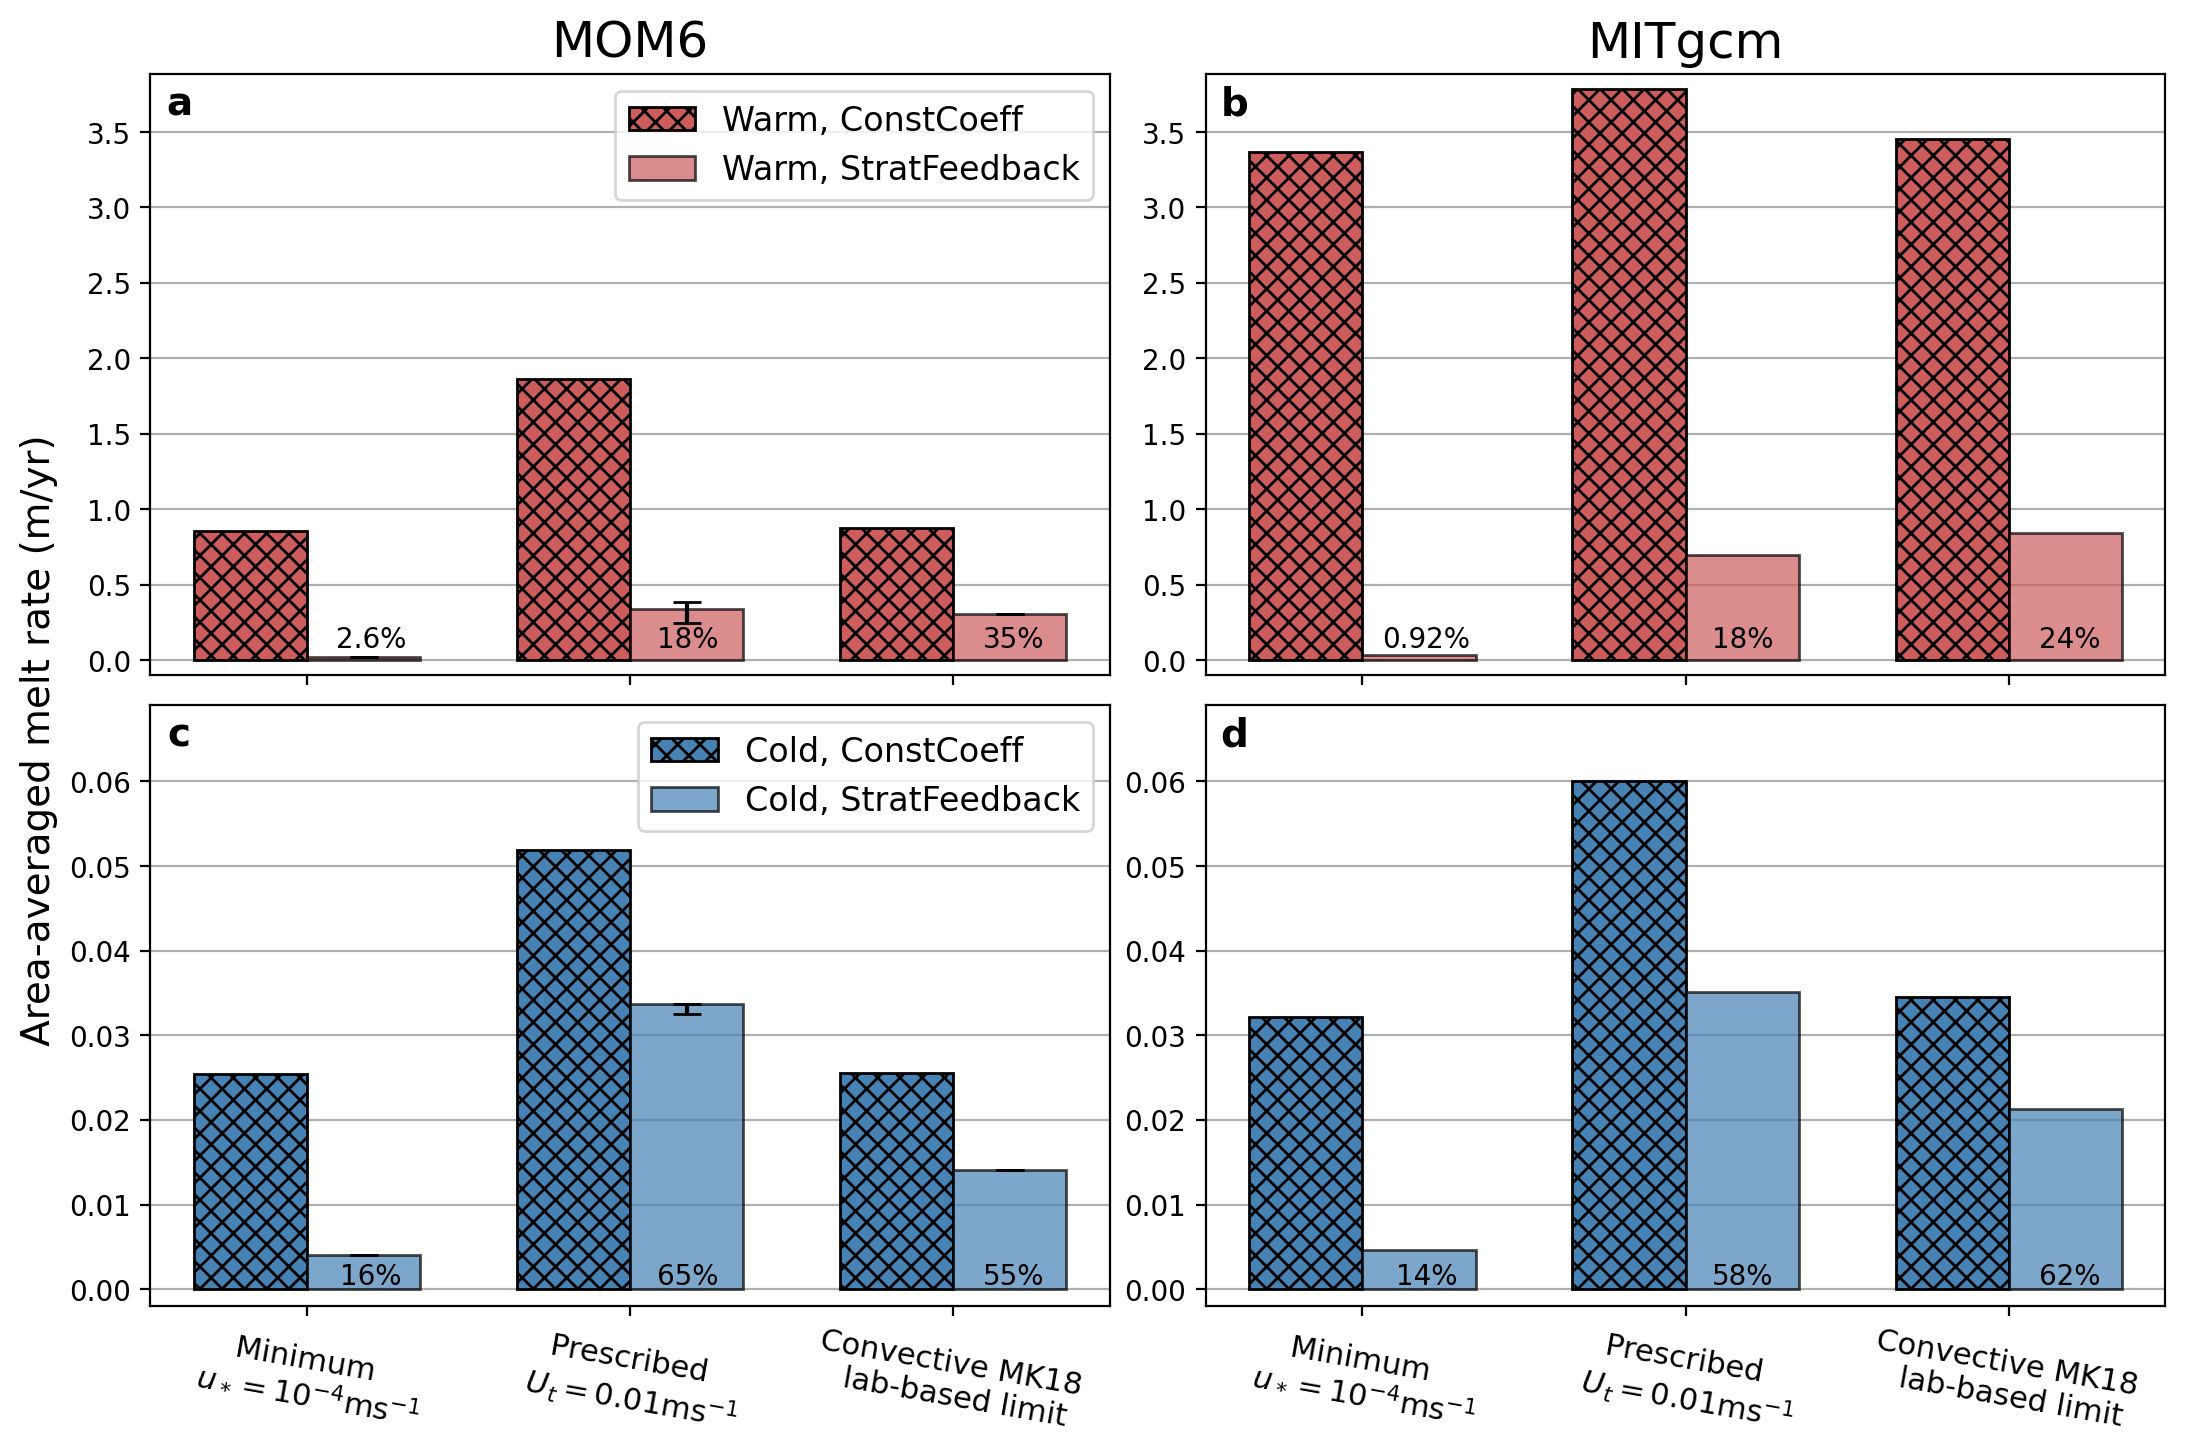

In [24]:
species = ("Minimum \n $u_*=10^{-4}$ms$^{-1}$", 
           "Prescribed \n $U_{t} = 0.01$ms$^{-1}$",
           "Convective MK18 \n lab-based limit")#,
          #"Convective \n MK18 limit, \n"+r" $\theta = 85^\circ$",
          #"Convective \n MK18 limit, \n"+r" $\theta = 89^\circ$",
          #"Convective \n MK18 limit, \n"+r"constant $\theta = 89.9^\circ$")
penguin_means = {
    'Warm, ConstCoeff': (mrs[0],mrs[4],mrs[8]),
    'Warm, StratFeedback': (mrs[1],mrs[5],mrs[9]),
    'Cold, ConstCoeff':(mrs[2],mrs[6],mrs[10]),
    'Cold, StratFeedback':(mrs[3],mrs[7],mrs[11])    
}

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, axes = plt.subplots(ncols = 2,nrows = 2, dpi = 200, figsize = (13,8),sharex = True)

for attribute, measurement in penguin_means.items():
    if attribute == 'Warm, ConstCoeff':
        multiplier = 0
        offset = width * multiplier
        rects = axes[0,0].bar(x + offset, measurement, width, label=attribute, color = 'indianred', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Warm, StratFeedback':
        multiplier = 1
        offset = width * multiplier        
        rects = axes[0,0].bar(x + offset, measurement, width, label=attribute, yerr = ((0,unc[1]-mrs[5],0),(0,mrs[5]-unc[0],0,)),capsize=5, color = 'indianred', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)
    elif attribute == 'Cold, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[1,0].bar(x + offset, measurement, width, label=attribute, color = 'steelblue', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Cold, StratFeedback':
        multiplier = 1
        offset = width * multiplier
        rects = axes[1,0].bar(x + offset, measurement, width, label=attribute, yerr = ((0,unc[3]-mrs[7],0,),(0,max(0,mrs[7]-unc[2]),0,)),
                              capsize=5, color = 'steelblue', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)

    #ax.bar_label(rects, padding=1)
        #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr = ((-0.2584+0.337,-0.036+0.039),(0.556-0.337,0.046-0.039)),capsize=10,color = ('indianred','steelblue'), edgecolor = 'k', hatch = None, alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
#axes[0,0].set_ylabel('Area-averaged melt rate (m/yr)', fontsize = 14)
axes[1,0].set_ylabel('                                           Area-averaged melt rate (m/yr)', fontsize = 14)
axes[0,0].set_title('MOM6', fontsize = 18)
axes[0,0].set_xticks(x + width*1/2, '', fontsize = 11, rotation=-10)
axes[1,0].set_xticks(x + width*1/2, species, fontsize = 11, rotation=-10)
axes[0,0].legend(loc='upper right', fontsize = 12)#, ncols=3)
#axes[1,0].legend(loc='upper left')#, ncols=3)

axes[0,0].set_ylim(-0.1, np.max(mrs_mit)+0.1)
axes[1,0].set_ylim(-0.002, 0.069)


penguin_means = {
    'Warm, ConstCoeff': (mrs_mit[0],mrs_mit[4],mrs_mit[8]),
    'Warm, StratFeedback': (mrs_mit[1],mrs_mit[5],mrs_mit[9]),
    'Cold, ConstCoeff':(mrs_mit[2],mrs_mit[6],mrs_mit[10]),
    'Cold, StratFeedback':(mrs_mit[3],mrs_mit[7],mrs_mit[11])}    

multiplier = 0

for attribute, measurement in penguin_means.items():
    #offset = width * multiplier
    if attribute == 'Warm, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[0,1].bar(x + offset, measurement, width, label=attribute, color = 'indianred', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Warm, StratFeedback':
        multiplier = 1    
        offset = width * multiplier
        rects = axes[0,1].bar(x + offset, measurement, width, label=attribute,capsize=5, color = 'indianred', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)
    elif attribute == 'Cold, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[1,1].bar(x + offset, measurement, width, label=attribute, color = 'steelblue', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Cold, StratFeedback':
        multiplier = 1      
        offset = width * multiplier
        rects = axes[1,1].bar(x + offset, measurement, width, label=attribute,capsize=5, color = 'steelblue', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)

    #ax.bar_label(rects, padding=1)
    #multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
#axes[1].set_ylabel('Area-averaged melt rate (m/yr)', fontsize = 14)
axes[0,1].set_title('MITgcm', fontsize = 18)
axes[0,1].set_xticks(x + width*1/2, '', fontsize = 11, rotation=-10)
axes[1,1].set_xticks(x + width*1/2, species, fontsize = 11, rotation=-10)
#axes[1].legend(loc='upper left')#, ncols=3)
axes[0,1].set_ylim(-0.1, np.max(mrs_mit)+0.1)
axes[1,1].set_ylim(-0.002, 0.069)
axes[1,0].legend(loc='upper right', fontsize = 12)#, ncols=3)

#plt.subplots_adjust(hspace = 0.4)
#fig.tight_layout(pad=5.0)
axes[0,0].text(0.03,0.95,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0,0].transAxes, fontsize = 14)
axes[0,1].text(0.03,0.95,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0,1].transAxes, fontsize = 14)
axes[1,0].text(0.03,0.95,'c',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1,0].transAxes, fontsize = 14)
axes[1,1].text(0.03,0.95,'d',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1,1].transAxes, fontsize = 14)

axes[0,0].grid(axis = 'y')
axes[0,1].grid(axis = 'y')
axes[1,0].grid(axis = 'y')
axes[1,1].grid(axis = 'y')

fig.subplots_adjust(wspace = 0.1, hspace = 0.05)

## Print percentages

axes[0,0].text(0.23,0.06,f'{(mrs[1]/mrs[0]*100):.1f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,0].transAxes)
axes[0,0].text(0.56,0.06,f'{(mrs[5]/mrs[4]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,0].transAxes)
axes[0,0].text(0.9,0.06,f'{(mrs[9]/mrs[8]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,0].transAxes)

axes[0,1].text(0.23,0.06,f'{(mrs_mit[1]/mrs_mit[0]*100):.2}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,1].transAxes)
axes[0,1].text(0.56,0.06,f'{(mrs_mit[5]/mrs_mit[4]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,1].transAxes)
axes[0,1].text(0.9,0.06,f'{(mrs_mit[9]/mrs_mit[8]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0,1].transAxes)

axes[1,0].text(0.23,0.05,f'{(mrs[3]/mrs[2]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,0].transAxes)
axes[1,0].text(0.56,0.05,f'{(mrs[7]/mrs[6]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,0].transAxes)
axes[1,0].text(0.9,0.05,f'{(mrs[11]/mrs[10]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,0].transAxes)

axes[1,1].text(0.23,0.05,f'{(mrs_mit[3]/mrs_mit[2]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,1].transAxes)
axes[1,1].text(0.56,0.05,f'{(mrs_mit[7]/mrs_mit[6]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,1].transAxes)
axes[1,1].text(0.9,0.05,f'{(mrs_mit[11]/mrs_mit[10]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1,1].transAxes)

plt.show()


# Tide plot

['layer-thermo-on-warm_CC', 'layer-thermo-on-warm_SF', 'layer-thermo-on-cold_CC', 'layer-thermo-on-cold_SF']
['layer-thermo-on-warm_CC-ustarmin', 'layer-thermo-on-warm_SF-ustarmin', 'layer-thermo-on-cold_CC-ustarmin', 'layer-thermo-on-cold_SF-ustarmin']
['layer-thermo-on-warm_CC-u02tides', 'layer-thermo-on-warm_SF-u02tides', 'layer-thermo-on-cold_CC-u02tides', 'layer-thermo-on-cold_SF-u02tides']
['layer-thermo-on-warm_CC-u01tides', 'layer-thermo-on-warm_SF-u01tides', 'layer-thermo-on-cold_CC-u01tides', 'layer-thermo-on-cold_SF-u01tides']
['layer-thermo-on-warm_CC-u005tides', 'layer-thermo-on-warm_SF-u005tides', 'layer-thermo-on-cold_CC-u005tides', 'layer-thermo-on-cold_SF-u005tides']
['layer-thermo-on-warm_CC-u001tides', 'layer-thermo-on-warm_SF-u001tides', 'layer-thermo-on-cold_CC-u001tides', 'layer-thermo-on-cold_SF-u001tides']


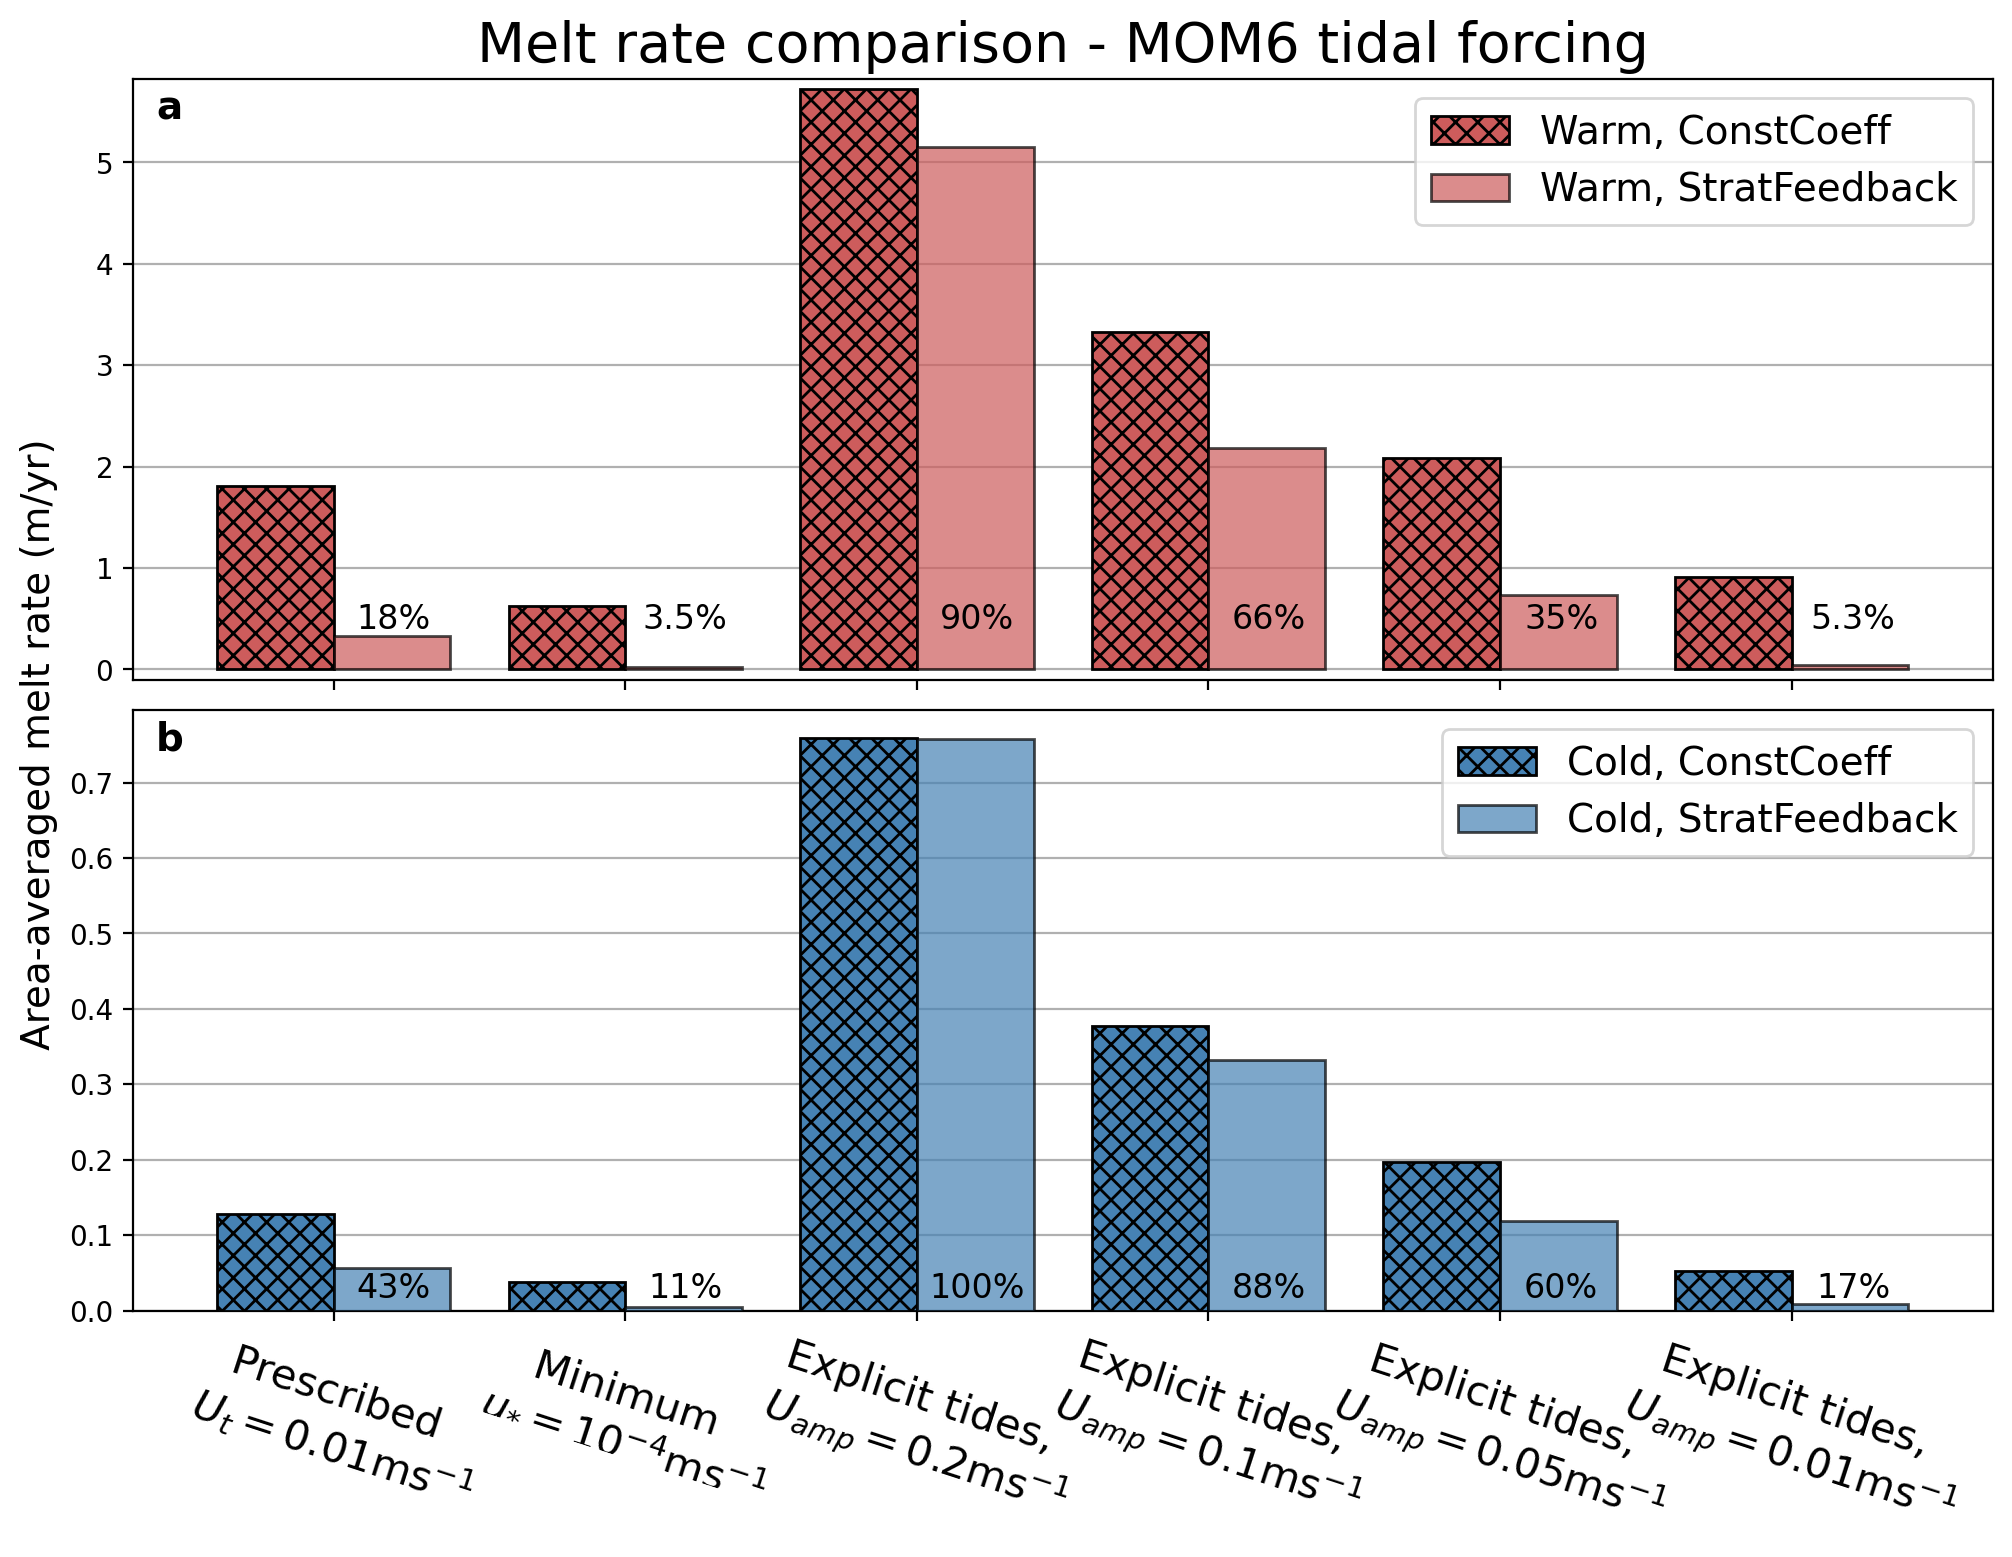

In [25]:
# column bar
mrs = np.zeros(4*6)
s_to_year = 3600*24*365
tt = 29
list_folders_base = ['layer-thermo-on-warm_CC','layer-thermo-on-warm_SF',
               'layer-thermo-on-cold_CC','layer-thermo-on-cold_SF']
suffixes = ['','-ustarmin','-u02tides','-u01tides','-u005tides','-u001tides']#,'-convectivelimitlocal']
for n in np.arange(len(suffixes)):
    list_folders = [x+suffixes[n] for x in list_folders_base]
    print(list_folders)
    for i in np.arange(4):
        ocean_daily_z = open_ocean_daily_z(i)
        dataplot = ocean_daily_z.melt.where(ocean_daily_z.melt!=0).mean(['xT','yT']).isel(time = tt).values
        mrs[i+n*4]= dataplot


species = ("Prescribed \n "+r"$U_{t} = 0.01$ms$^{-1}$", 
           "Minimum \n "+r"$u_{*}=10^{-4}$ms$^{-1}$", 
           "Explicit tides, \n $U_{amp} = 0.2$ms$^{-1}$",
           "Explicit tides, \n $U_{amp} = 0.1$ms$^{-1}$",
           "Explicit tides, \n $U_{amp} = 0.05$ms$^{-1}$",
           "Explicit tides, \n $U_{amp} = 0.01$ms$^{-1}$")#,
           
           #"Convective \n McConnochie & Kerr (2018) \n lab-based limit")#,
          #"Convective \n MK18 limit, \n"+r" $\theta = 85^\circ$",
          #"Convective \n MK18 limit, \n"+r" $\theta = 89^\circ$",
          #"Convective \n MK18 limit, \n"+r"constant $\theta = 89.9^\circ$")
penguin_means = {
    'Warm, ConstCoeff': (mrs[0],mrs[4],mrs[8],mrs[12],mrs[16],mrs[20]),#mrs[20]),
    'Warm, StratFeedback': (mrs[1],mrs[5],mrs[9],mrs[13],mrs[17],mrs[21]),
    'Cold, ConstCoeff':(mrs[2],mrs[6],mrs[10],mrs[14],mrs[18],mrs[22]),
    'Cold, StratFeedback':(mrs[3],mrs[7],mrs[11],mrs[15],mrs[19],mrs[23])    
}

x = np.arange(len(species))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, axes = plt.subplots(dpi = 200, figsize = (12,8),nrows = 2,sharex = True)


for attribute, measurement in penguin_means.items():
    if attribute == 'Warm, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[0].bar(x + offset, measurement, width, label=attribute, color = 'indianred', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Warm, StratFeedback':
        multiplier = 1      
        offset = width * multiplier
        rects = axes[0].bar(x + offset, measurement, width, label=attribute, capsize=5, color = 'indianred', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)
    elif attribute == 'Cold, ConstCoeff':
        multiplier = 0      
        offset = width * multiplier
        rects = axes[1].bar(x + offset, measurement, width, label=attribute, color = 'steelblue', edgecolor = 'k', hatch = 'xxx', zorder = 3)
    elif attribute == 'Cold, StratFeedback':
        multiplier = 1      
        offset = width * multiplier
        rects = axes[1].bar(x + offset, measurement, width, label=attribute, capsize=5, color = 'steelblue', edgecolor = 'k', hatch = None, alpha = 0.7, zorder = 3)

    #ax.bar_label(rects, padding=1)
    multiplier += 1
        #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr = ((-0.2584+0.337,-0.036+0.039),(0.556-0.337,0.046-0.039)),capsize=10,color = ('indianred','steelblue'), edgecolor = 'k', hatch = None, alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
#axes[0].set_ylabel('Area-averaged melt rate (m/yr)', fontsize = 16)
axes[1].set_ylabel('                                           Area-averaged melt rate (m/yr)', fontsize = 14)
axes[0].set_title('Melt rate comparison - MOM6 tidal forcing', fontsize = 20)
axes[1].set_xticks(x + width*1/2, species, fontsize = 15, rotation=-18)
axes[0].legend(loc='upper right',fontsize = 14)#, ncols=3)
axes[1].legend(loc='upper right',fontsize = 14)#, ncols=3)
axes[0].set_ylim(-0.1, np.max(mrs)+0.1)
#ax.set_yticklabels(fontsize = 14)
#plt.subplots_adjust(hspace = 0.4)
#fig.tight_layout(pad=5.0)
#plt.grid()
axes[0].text(0.02,0.95,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0].transAxes, fontsize = 14)
axes[1].text(0.02,0.95,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1].transAxes, fontsize = 14)
axes[0].grid(axis = 'y')
axes[1].grid(axis = 'y')

fig.subplots_adjust(wspace = 0.15, hspace = 0.05)

for i in np.arange(6):
    if (mrs[i*4+1]/mrs[i*4+0]*100)<10:
        axes[0].text(0.14+(0.157)*i,0.1,f'{(mrs[i*4+1]/mrs[i*4+0]*100):.2}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0].transAxes, fontsize = 12)
    else:
        axes[0].text(0.14+(0.157)*i,0.1,f'{(mrs[i*4+1]/mrs[i*4+0]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[0].transAxes, fontsize = 12)
    if (mrs[i*4+3]/mrs[i*4+2]*100)<10:
        axes[1].text(0.14+(0.157)*i,0.037,f'{(mrs[i*4+3]/mrs[i*4+2]*100):.2}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1].transAxes, fontsize = 12)
    else:
        axes[1].text(0.14+(0.157)*i,0.037,f'{(mrs[i*4+3]/mrs[i*4+2]*100):.0f}'+'%',horizontalalignment='center',verticalalignment='center',
               transform = axes[1].transAxes, fontsize = 12)

plt.show()

In [20]:
0.295-0.14

0.15499999999999997